# Classifying Irises
This demo shows how to build a decision tree and random forest classifier using Scikit-learn for a dataset that does not require any preprocessing. It is referred to in the hierarchical clustering demo (hierarchical-clustering.ipynb) where we weight features using (optionally) the feature weights from the models in this demo.

We use the well-known iris dataset (https://en.wikipedia.org/wiki/Iris_flower_data_set) which is available from several sources including from Scikit-learn directly.

First we'll import numpy, Matplotlib and everything we need from Scikit-learn.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

The Scikit-learn functions we'll use in this notebook employ the random number generator from NumPy. Seeding the random number generator is optional. Doing so means that we'll get the same results every time we run the notebook which might be convenient. The number 0 is often used as a seed, as is 42 (a reference to The Hitchhiker's Guide to the Galaxy by Douglas Adams), but any seed will ensure that the random number generator produces a consistent sequence of numbers.

In [2]:
np.random.seed(0)

Now we'll get the dataset.

The variable names X (uppercase) and y (lowercase) are often used in machine learning. X denotes the features, in this case 4-dimensional vectors for each iris: petal length, petal width, sepal length, and sepal width. The variable y denotes the label assigned to each feature vector, in this case the species of iris. It is the fact that we have these labels that makes this a demo of supervised machine learning. Unsupervised machine learning does not rely on the availability of labels.

In [3]:
X, y = load_iris(as_frame=True, return_X_y=True)

After we build our models, we'll want to evaluate them. It would be cheating to evaluate a model using the same data that we used to build it. We really want to know how well the model does on new data that it hasn't seen before. Here we divide the dataset into training and test data. We'll use 70% of the data to build the model (X_train and y_train) and 30% of the data to test the model (X_test and y_test). The train_text_split function that we imported makes this easy.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,  # 30% of the data will go to the test set
    stratify=y  # keep the proportion of iris species consistent across training and test sets
)

Machine learning practitioners can be inconsistent in their use of terminology. I'm using the terms 'training set' and 'test set' here, which is common and is consistent with the function name 'train_test_split'. But you'll also hear the term 'validation set'. When people use this they are often using the following definitions (which are also common so you need to know about them):
- training set: the data used to build the model
- validation set: the data used optimise the model (we'll discuss model optimisation in a future session)
- test set: the data used to finally evaluate the model after optimisation

There are other ways to partition a dataset, e.g. using cross-validation which you can explore. For now we'll stick with the simple idea that we build a model with one portion of the data and evaluate it with the other.

## Decision tree classifier
Decision trees are not as accurate as some other types of model (we'll compare with random forests shortly), but a single decision tree is easier to examine and interpret. Here we build and plot a decision tree. This will enable us to see that the petal length and petal width features are more useful for this classification task.

First we create a DecisionTreeClassifier object. There are some parameters that might affect the size of the tree and how it is built. We can experiment with these.

In [5]:
clf_tree = DecisionTreeClassifier(
    min_samples_split=25,
    min_samples_leaf=25,
)

We now create our decision tree by fitting the training data.

In [6]:
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=25, min_samples_split=25)

The plot_tree function lets us inspect the decision tree.

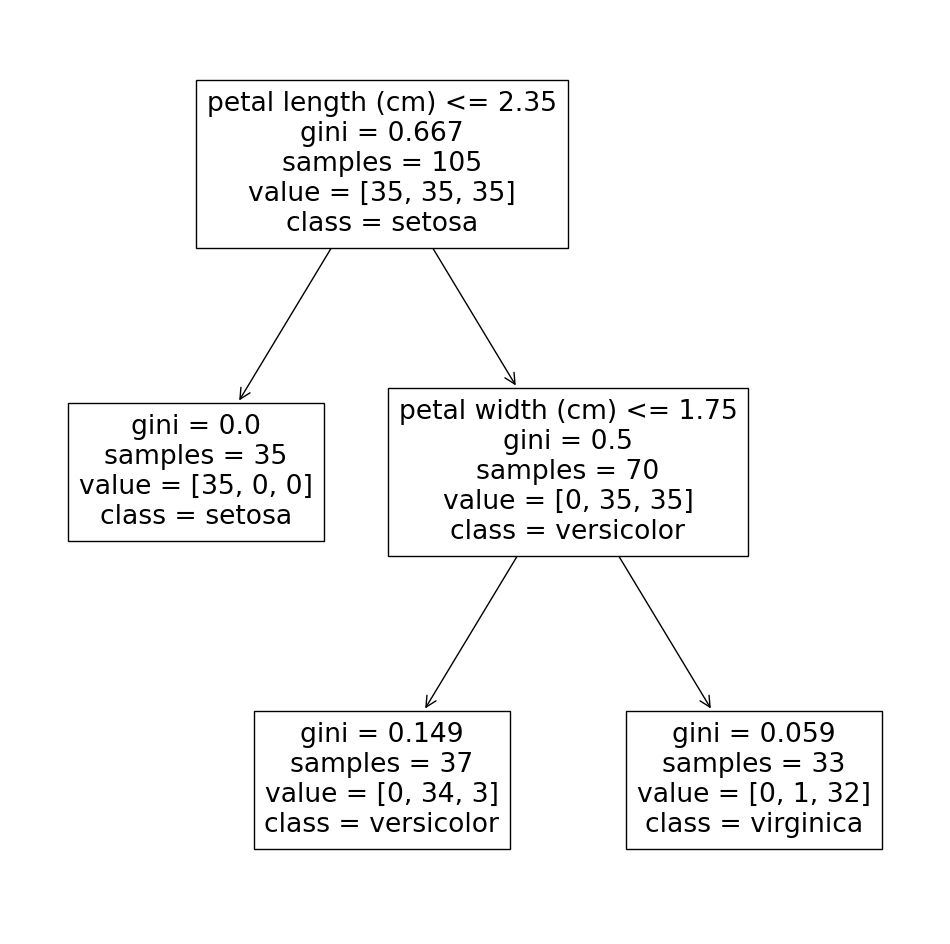

In [7]:
plt.figure(figsize=(12, 12))  # set plot size (denoted in inches)
plot_tree(clf_tree,
          feature_names=list(X.columns),
          class_names=['setosa', 'versicolor', 'virginica']
          )
plt.show()

We can use our decision tree to predict the class of all irises in the test set.

In [8]:
y_tree_predictions = clf_tree.predict(X_test)

There are three species of iris, so each prediction is either 0, 1, or 2 (setosa = 0, versicolor = 1, and virginica = 2).

In [9]:
y_tree_predictions

array([2, 2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 2, 0, 2, 1, 1, 1, 1, 1, 0, 1, 2,
       0, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 0, 2, 0, 0,
       2])

We now evaluate the accuracy of the decision tree by comparing the model's predictions with the actual labels in the test set. Accuracy is defined as: number of correct predictions / number of predictions made.

In [10]:
print(f'Tree accuracy: {accuracy_score(y_test, y_tree_predictions)}')

Tree accuracy: 0.9555555555555556


In Scikit-learn, tree-based models allow us to inspect the importance of each feature.

In [11]:
print(f'Tree feature importances: {clf_tree.feature_importances_}')

Tree feature importances: [0.         0.         0.55957837 0.44042163]


This probably makes more sense when we graph it:

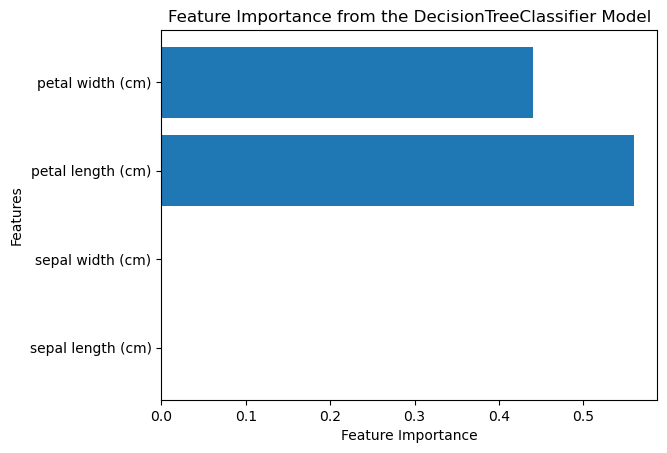

In [12]:
plt.barh(X.columns, clf_tree.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from the DecisionTreeClassifier Model')
plt.show()

Note that the feature importances are specific to the trained model and will likely change if we change it (e.g. using different training data or initialise it with different parameter values that affect the tree structure). For example, setting min_samples_split=4 means that the decision tree can no longer include the question "sepal length (cm) <= 1.341" because the node only had 3 samples at that point. Making a decision based on so few samples could hurt the generality of the model due to overfitting. A simpler model may do better on unseen data even if it does slightly worse on the training data and give us a better estimate of the real feature importances.

## Random forest classifier
Random forest models consist of multiple decision trees working together and generally perform better than decision trees. They are often a first choice for machine learning practitioners exploring a new machine learning problem. Here we will build a RandomForestClassifier model and see that the design of scikit-learn means that this is no more difficult than building the DecisionTreeClassifier model.

We will follow the same steps. First create our RandomForestClassifier object. I've chosen to set various parameters like the number of estimators and the maximum depth of the tree. Again, you could experiment with different values or just stick with the defaults.

In [13]:
clf_forest = RandomForestClassifier(
    n_estimators=50,
    max_depth=1,
    max_samples=20,
    n_jobs=-1,  # This allows trees to be built in parallel using all available processors
)

Next, fit the model to to the data. The different types of model are designed to be as consistent as possible, so we can use the fit method here too.

In [14]:
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=1, max_samples=20, n_estimators=50, n_jobs=-1)

And we get the predictions for the classes in the test set in the same way.

In [15]:
y_forest_predictions = clf_forest.predict(X_test)
y_forest_predictions

array([2, 2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 2, 0, 2, 1, 1, 1, 1, 1, 0, 1, 2,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 0, 2, 0, 0,
       2])

Now we'll get the accuracy.

In [16]:
accuracy_score(y_test, y_forest_predictions)

0.9777777777777777

Random forest models also allow us to inspect feature importances.

In [17]:
clf_forest.feature_importances_

array([0.14, 0.  , 0.36, 0.5 ])

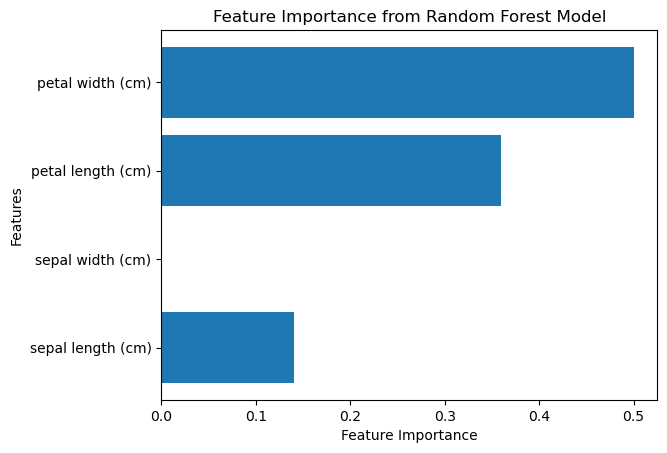

In [18]:
plt.barh(X.columns, clf_forest.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest Model')
plt.show()

If desired, we can scale these so that the maximum value is 1, making it easier to compare their relative importance

In [19]:
clf_forest.feature_importances_ / max(clf_forest.feature_importances_)

array([0.28, 0.  , 0.72, 1.  ])

And same for the decision tree: 

In [20]:
clf_tree.feature_importances_ / max(clf_tree.feature_importances_)

array([0.        , 0.        , 1.        , 0.78705979])

### Examine individual trees in the forest
Each tree in a RandomForestClassifier is a DecisionTreeClassifier. We can access each one individually and plot it if we wish.

In [21]:
n = len(clf_forest.estimators_)
print(f'There are {n} decision trees in this forest.')

There are 50 decision trees in this forest.


Let's have a look at the first tree in this random forest.

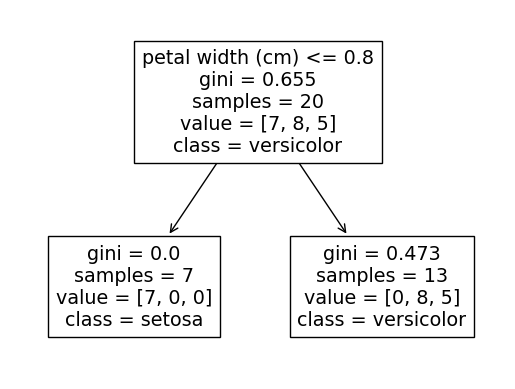

In [22]:
individual_tree = clf_forest.estimators_[0]

plot_tree(individual_tree,
          feature_names=list(X.columns),
          class_names=['setosa', 'versicolor', 'virginica']
          )
plt.show()